# Exercises in Classification II

The hand-in exercise for this topic is Exercise 2 from the notebook “Exercises in
Classification II.ipynb” (It is the same as Exercise 2 from the notebook “Exercises in
Classification I.ipynb”).

In [72]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [73]:
adult  = pd.read_csv("C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\Data_and_Things_W2025_Exercises\\data\\adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. Clean the `income` variable such that it has only two values


In [74]:
adult = adult.replace({"<=50K." : "<=50K", ">50K.": ">50K" })
adult['income'].value_counts()

adult = pd.get_dummies(adult, columns=['income'], dtype=int, drop_first=True)



### 2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

In [ ]:
#"age", "workclass", "fnlwgt",	"education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",	"native-country"
# my Feature variables are Race and Sex, age and education num.
X = adult[['age', 'race', 'sex', 'education-num']]

#getting the dummy vars out of the categorical variables
X  = pd.get_dummies(X, columns=['race', 'sex'], dtype=int, drop_first=True)

y = adult['income_>50K']

### 3. Create X and y dataset and split the datasets into training and testing sets


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state= 808)
#Here, the Dataset is broken into two parts in a ratio of 75:20
#It means 75% for model training and 20% for model testing

### 4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 


In [78]:
def knnSweepCrossValidation(X, y, maxK, folds=10):
    #empty list to store mean accuracy scores for each K.
    kacclist = []   
        
    #for each K
    for k in range(2, maxK):
        # create KNN classifier using that K
        knn = KNeighborsClassifier(n_neighbors=k)     
        #perform cross validation and 
        scores = cross_val_score(knn, X, y, cv = folds)
        #append to dataframe
        kacclist.append({"K": k, "CV accuracy": scores.mean()})

    return pd.DataFrame(kacclist)

In [79]:
#takes a bit, but we are also running 30 KNNs
Knn30= knnSweepCrossValidation(X_train, y_train, 30)
Knn30

,K,CV accuracy
0,2,0.776265
1,3,0.765900
2,4,0.782638
3,5,0.779413
4,6,0.786400
5,7,0.785376
6,8,0.787628
7,9,0.786732
8,10,0.791569
9,11,0.790392


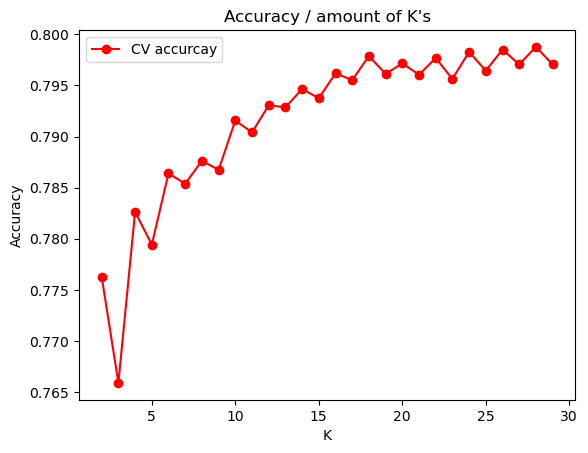

In [80]:
plt.plot(Knn30["K"], Knn30["CV accuracy"], label = 'CV accurcay', color='red', marker='o', linestyle='solid') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy / amount of K's")
plt.legend()

plt.show()

In [81]:
def train(x,ytrain,ytest,k):

    # training model entire training dataset
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, ytrain)

    #Evaluating on unseen test data 
    y_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(ytest, y_pred)

    print(f"Test Accuracy with K={k}: {test_accuracy:.4f}")





In [82]:
#K18 looked good
train(X_train, y_train, y_test, 18)

Test Accuracy with K=18: 0.7963


In [83]:
def mkConfMatrix(k, X_train, X_test, y_train, y_test):
    knnX = KNeighborsClassifier(n_neighbors=k)
    knnX.fit(X_train, y_train)
    y_pred = knnX.predict(X_test)
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    print(f"K:{k}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1: {f1_score(y_test, y_pred)}")

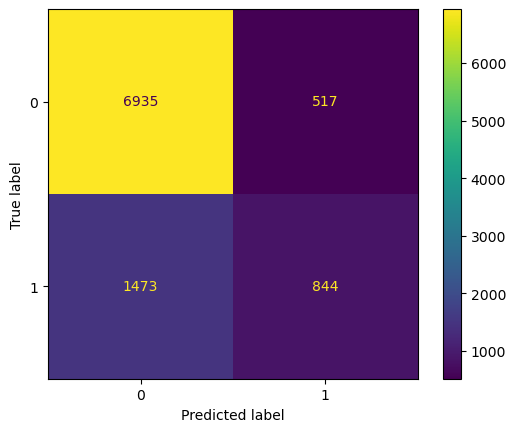

K:18
Accuracy: 0.7962944006551336
Precision: 0.6201322556943424
Recall: 0.3642641346568839
F1: 0.45894507884719954


In [84]:
mkConfMatrix(18,X_train, X_test, y_train, y_test)

### 5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.


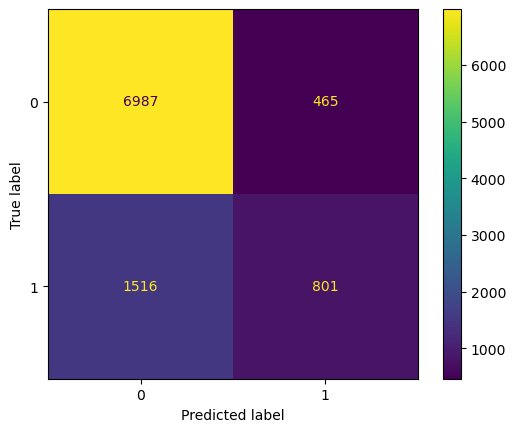


Accuracy: 0.7972156822602109 
Precision: 0.6327014218009479 
Recall: 0.34570565386275354 
F1: 0.4471113591962043


In [85]:
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train)
logreg_y_pred_test = logreg.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, logreg_y_pred_test)).plot()
plt.show()
print(f"\nAccuracy: {accuracy_score(y_test, logreg_y_pred_test)} \nPrecision: {precision_score(y_test,logreg_y_pred_test)} \nRecall: {recall_score(y_test,logreg_y_pred_test)} \nF1: {f1_score(y_test,logreg_y_pred_test)}")


Logistic Regression has a slight edge in precision, while KNN has a slightly better recall and F1 score.
ultimately no difference here

### 6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


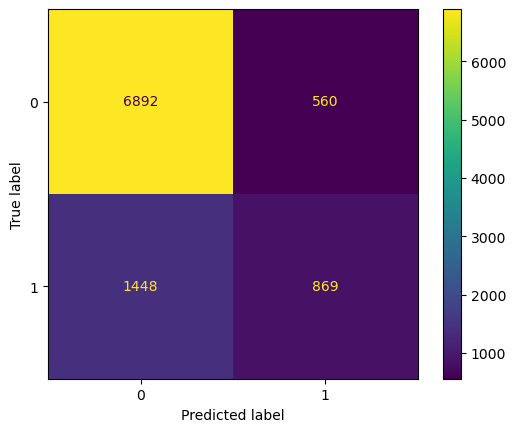


Accuracy: 0.794451837444979 
Precision: 0.6081175647305809 
Recall: 0.37505394907207595 
F1: 0.4639615589962627


In [86]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred_test = dtree.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()
plt.show()
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_test)} \nPrecision: {precision_score(y_test,y_pred_test)} \nRecall: {recall_score(y_test,y_pred_test)} \nF1: {f1_score(y_test,y_pred_test)}")


### 7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


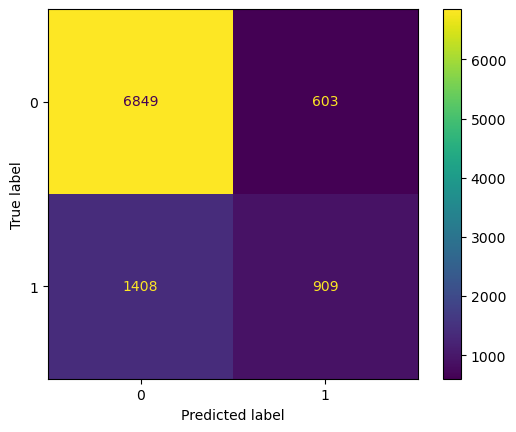


Accuracy: 0.7941447435766199 
Precision: 0.6011904761904762 
Recall: 0.39231765213638325 
F1: 0.47479759728388615


In [87]:
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)
rf_y_pred_test = rf_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_pred_test)).plot()
plt.show()
print(f"\nAccuracy: {accuracy_score(y_test, rf_y_pred_test)} \nPrecision: {precision_score(y_test, rf_y_pred_test)} \nRecall: {recall_score(y_test,rf_y_pred_test)} \nF1: {f1_score(y_test,rf_y_pred_test)}")



### 8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

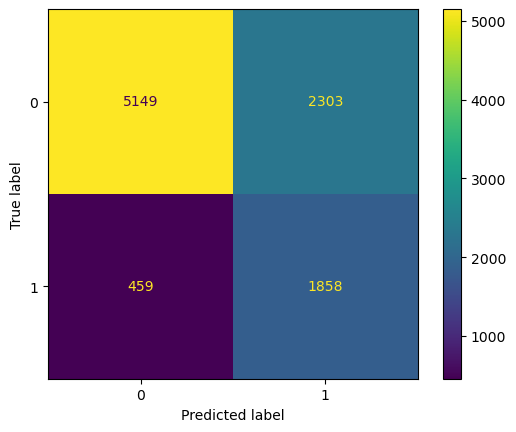


Accuracy: 0.7172689118640598 
Precision: 0.4465272770968517 
Recall: 0.8018990073370738 
F1: 0.5736338376041988


In [89]:
#was required to resample my data, as running ADAboost only predicting the class 0 for all instances in the test split. Meaning i got a 0 for Precision, Recall, and F1-score.
# I had to use SMOTE to oversample - still not certain why it was not performing with adaboost

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ab_model = AdaBoostClassifier() 
ab_model.fit(X_resampled, y_resampled)
ab_y_pred_test = ab_model.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, ab_y_pred_test)).plot()
plt.show()

print(f"\nAccuracy: {accuracy_score(y_test, ab_y_pred_test)} \nPrecision: {precision_score(y_test, ab_y_pred_test)} \nRecall: {recall_score(y_test, ab_y_pred_test)} \nF1: {f1_score(y_test, ab_y_pred_test)}")


# Analysis of results I got 

**KNN (K=18)<br>**
Accuracy: 0.7962944006551336 <br>
Precision: 0.6201322556943424 <br>
Recall: 0.3642641346568839 <br>
F1: 0.45894507884719954 <br>

**Logistic Regression<br>**
Accuracy: 0.7972156822602109 <br> 
Precision: 0.6327014218009479 <br>
Recall: 0.34570565386275354 <br>
F1: 0.4471113591962043<br>

**Decision Tree<br>**
Accuracy: 0.794451837444979 <br>
Precision: 0.6081175647305809 <br>
Recall: 0.37505394907207595 <br>
F1: 0.4639615589962627<br>

**Random Forest<br>**
Accuracy: 0.7941447435766199 <br>
Precision: 0.6011904761904762 <br>
Recall: 0.39231765213638325 <br>
F1: 0.47479759728388615<br>

**AdaBoost<br>**
Accuracy: 0.7085679189272187 <br> 
Precision: 0.43799719232569023 <br>
Recall: 0.8079413034095814 <br>
F1: 0.5680473372781065 <br>



**Accuracy:**
% of correctly predicted positive and negative instances.

**Precision:** 
When high -> low false positive rate 
when low -> high false positive rate
Rate of reliablility in terms of how many instanced predicted to be positives, but they turned out to be negatives (false positives).  

**Recall:**
High -> low false negative rate, captures a lot of postives correctly.
low -> misses many positives

**F1:** 
High -> good balance between precision and recall
i.e good at maximizing correctly predicted postives, and minimizing false positives



With this we can analyze the results above.

AdaBoost has the best F1 score, even though its accuracy is the lowest, which means it has a lot of false postives.

Logistic Regression is ideal for minimizing false positives.

KNN, Decision Tree, and Random Forest all are somewhat balanced in their performance.
KNN is best for getting the positives right, as it has teh highest recall of the bunch.

Random forest could benifit from hyper parameter tuning.

